In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA, PCA
from sklearn.datasets import make_circles
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from ipywidgets import interactive, interact, fixed, widgets
import time

# Equation d'advection-diffusion

L'équation de la chaleur en une dimension spatiale est donnée par :
$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = \alpha \frac{\partial^2 u}{\partial x^2}$$
où $\alpha $ représente le coefficient de diffusion et $c$ la vitesse de convection.

La condition initiale est choisie comme une fonction gaussienne :

$$u(x,0) = A e^{-\frac{(x-x_0)^2}{2\sigma^2}}$$

où $\sigma$ est l'écart-type de la distribution initiale.

Simulons cela numériquement :

In [120]:
# Paramètres de simulation
L = 20.0       # Longueur du domaine
Nx = 200       # Nombre de points spatiaux
x = np.linspace(0, L, Nx)
dx = L / (Nx - 1)
c = 1.0        # Vitesse d'advection
nu = 0.05       # Coefficient de diffusion
dt = 0.01      # Pas de temps
T = 1.5        # Temps final
Nt = int(T / dt)  # Nombre de pas de temps

# Condition initiale
u = np.exp(-((x - L/4)**2) / 0.5)

# Matrice pour stocker la solution
U = np.zeros((Nx, Nt))
U[:, 0] = u

# Solution de l'équation d'advection-diffusion par différences finies
for n in range(1, Nt):
    U[1:-1, n] = U[1:-1, n-1] - c * dt / dx * (U[1:-1, n-1] - U[:-2, n-1]) + \
                 nu * dt / dx**2 * (U[2:, n-1] - 2 * U[1:-1, n-1] + U[:-2, n-1])
    U[0, n] = U[-1, n] = 0  # Conditions aux limites

## DMD
On applique l'algorithme DMD du cours et on propage en temps les mode DMD pour simuler notre système

In [121]:
# matrices de données X et X'

# SVD sur X


# Réduction de rang pour la SVD
r = 10  # Nombre de modes à conserver

# Calcul de K_tilde

# Valeurs propres et vecteurs propres de A_tilde
eigvals, Q = np.linalg.eig(K_tilde)

# Modes DMD
# Phi = 

# Calcul des amplitudes b des modes DMD pour correspondre à la condition initiale
b = np.linalg.pinv(Phi) @ U[:, 0]

# Dynamique temporelle DMD
# Calculer la dynamique temporelle pour chaque mode


# Reconstruction des données
#DMD_reconstructed = 


# Fonction pour visualiser les resultats
def plot_solution(n):
    plt.plot(x, DMD_reconstructed.real[:,n], label='DMD')
    try:
        plt.plot(x[::4], U[::4,n], 'r.', label='FOM')
    except:
        pass
    
    plt.xlabel("x")
    plt.ylabel("u")
    plt.ylim([-0.1,1.2])
    plt.title("t = %.1f"%(dt*n))
    plt.legend()
    plt.show()

# Création d'un widget interactif pour jouer avec gamma et le nombre de composantes
w = widgets.IntSlider(value=0, min=0, max=Nt_ROM-1)
interactive_plot = interactive(plot_solution, n=w)
interactive_plot




interactive(children=(IntSlider(value=0, description='n', max=374), Output()), _dom_classes=('widget-interact'…

## Choix des observables

On considère une serie temporelle venant d'un système dynamique inconnue

In [122]:
# Paramètres
T = 2  # Temps final
dt = 0.01  # Pas de temps
N = int(T / dt)  # Nombre de pas de temps
t = np.linspace(0, T, N+1)  # Vecteur temps
r = 10  # Taux de croissance

# Résolution de l'équation différentielle
def logistic_growth(x):
    return r * x * (1 - x**2)

# Génération des données
x = np.zeros(N+1)
x[0] = 0.1  # Condition initiale
for i in range(N):
    x[i+1] = x[i] + logistic_growth(x[i]) * dt

### Exercice : appliquez la DMD avec des obervables retardés en temps
Consignes : essayez avec d'abord 3 observables retardés $[x_k, x_{k-1}, x_{k-2}]$ puis avec 5, 7, 10, 15
Calculez autant de modes DMD que d'observables considérés
Observez la dynamique prédite jusqu'à un horizon temporel de $3T$

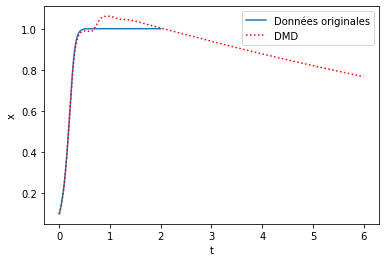

In [126]:
n_dmd = 10  # Nombre de modes à conserver
T_dmd = 3 * T  # Temps final pour le modele DMD


N_dmd = int(T_dmd  / dt)  # Nombre de pas de temps
t_dmd  = np.linspace(0, T_dmd , N_dmd)  # Vecteur temps

# Construction de la matrice des snapshots
#X = 
#X_prime = 

# SVD sur X


# Réduction de rang pour la SVD


# Calcul de K_tilde
#K_tilde = 

# Valeurs propres et vecteurs propres de A_tilde
eigvals, Q = np.linalg.eig(K_tilde)

# Modes DMD
#Phi = 

# Calcul des amplitudes b des modes DMD pour correspondre à la condition initiale
#b = 

# Dynamique temporelle DMD
# Calculer la dynamique temporelle pour chaque mode

# Reconstruction des données
#DMD_reconstructed = 

plt.figure()
plt.plot(t, x, label='Données originales')
plt.plot(t_dmd, DMD_reconstructed[-1,:].real,'r:', label='DMD')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()


# Identification de système
Sur l'exemple du cours, testez les limites de l'approche : sans toucher aux données, essayez de changer la tolérence de l'algorithme LASSO, la valeur du coefficient de pondération alpha, les termes dans la biblioteque, etc.

In [128]:
def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Paramètres du système de Lorenz
sigma, rho, beta = 10, 28, 8/3

# Conditions initiales et configuration de l'intégration
N_lorentz = 7000
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 15)  # Intégrer de t=0 à t=2
t_eval = np.linspace(t_span[0], t_span[1], N_lorentz)  # Points de temps où la solution est évaluée

# Résolution du système de Lorenz
sol = solve_ivp(lorenz_system, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval, method='RK45')

# Fonction pour visualiser les resultats
def plot_traj(n):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(sol.y[0][:n], sol.y[1][:n], sol.y[2][:n], color='b', alpha=0.7, linewidth=0.7)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Trajectoires du système de Lorenz')
    ax.set_xlim([-20,20])
    ax.set_ylim([-25,30])
    ax.set_zlim([0,50])
    plt.show()

# Création d'un widget interactif pour jouer avec gamma et le nombre de composantes
w = widgets.IntSlider(value=0, min=1, max=N_lorentz-1)
interactive_plot = interactive(plot_traj, n=w)
interactive_plot


interactive(children=(IntSlider(value=1, description='n', max=6999, min=1), Output()), _dom_classes=('widget-i…

In [117]:
# En utilisant LASSO
models = [Lasso(alpha=0.01, max_iter=200000, fit_intercept=True, tol=1e-4).fit(X, X_dot[:, i]) for i in range(X_dot.shape[1])]

# Affichage des coefficients pour chaque variable
for i, model in enumerate(models):
    print(f"Équation pour la variable {i+1}:")
    print(" + ".join(f"{coef:.2f}*{name}" for coef, name in zip(model.coef_, ['x', 'y', 'z', 'xy', 'yz', 'xz', 'x^2', 'y^2', 'z^2', 'x^3', 'y^3', 'z^3', 'xyz', 'sin(x)', 'sin(y)', 'sin(z)']) if abs(coef) > 5e-2))

Équation pour la variable 1:
-9.61*x + 9.82*y
Équation pour la variable 2:
27.94*x + -0.85*y + -1.00*xz
Équation pour la variable 3:
-2.57*z + 1.00*xy


## Bonus
Reprendre le cas d'advection-diffusion, et projetez le ROM en suivant l'approche du cours précédent